In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [3]:
#load data
train = pd.read_csv("sales_train.csv")
test = pd.read_csv("test.csv")


In [4]:
train = train.loc[(train.item_cnt_day < 2000)]

train.date = train.date.apply(lambda x:dt.datetime.strptime(x, '%d.%m.%Y'))
train.date = train.date.apply(lambda x:dt.datetime.strftime(x,'%Y-%m'))
data = train.groupby(['date','item_id','shop_id']).sum().reset_index()

data = data[['date','item_id','shop_id','item_cnt_day']]

table = pd.pivot_table(data, values='item_cnt_day', index=['item_id', 'shop_id'],
                        columns=['date'], aggfunc=np.sum).reset_index()
table = table.fillna(0)

#get rid of those not in test data
data_inc = test.merge(table, on = ['item_id', 'shop_id'], how = 'left')
data_inc = data_inc.fillna(0)
data_inc = data_inc.iloc[:,3:]

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01,0,59,22154,999.00,1.0
1,2013-01,0,25,2552,899.00,1.0
2,2013-01,0,25,2552,899.00,-1.0
3,2013-01,0,25,2554,1709.05,1.0
4,2013-01,0,25,2555,1099.00,1.0


In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data_inc.values.T)
dataset = dataset.T

X, y = dataset[:,:33], dataset[:,33:]

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#check shape of x_train and y_train
# reshape input to be [samples, time steps, features]
x_train = x_train.reshape((149940, 33, 1))
y_train = y_train.reshape((149940,1))
x_test = x_test.reshape((64260, 33, 1))
y_test = y_test.reshape((64260,1))

In [6]:
batch_size = 1260
look_back = 33
def model_1(): #change neurons
    model = Sequential()
    model.add(LSTM(64, batch_input_shape=(batch_size, x_train.shape[1], x_train.shape[2]),
                   stateful = False))
    model.add(Dense(1))
    adam = optimizers.Adam()
    model.compile(loss='mse', optimizer=adam, metrics=['mean_squared_error'])

    return model

model1 = model_1()

#record training time
start=time.time()
training1=model1.fit(x_train, y_train, batch_size = 1260, epochs = 7, shuffle=False)
end=time.time()
print("--------------------------")
print("Total training time (seconds)", end-start)

# make predictions
trainPredict = model1.predict(x_train, batch_size = 1260)
testPredict = model1.predict(x_test,batch_size = 1260)

#test error
test_rmse = model1.evaluate(x_test, y_test,batch_size = 1260)
print("--------------------------")
print('RMSE' , test_rmse[0])

Epoch 1/7
149940/149940 [==============================] - 55s 368us/step - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 2/7
149940/149940 [==============================] - 57s 379us/step - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 3/7
149940/149940 [==============================] - 61s 408us/step - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 4/7
149940/149940 [==============================] - 60s 401us/step - loss: 0.0603 - mean_squared_error: 0.0603
Epoch 5/7
149940/149940 [==============================] - 60s 398us/step - loss: 0.0602 - mean_squared_error: 0.0602
Epoch 6/7
149940/149940 [==============================] - 57s 380us/step - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 7/7
149940/149940 [==============================] - 55s 368us/step - loss: 0.0601 - mean_squared_error: 0.0601
--------------------------
Total training time (seconds) 405.89851903915405
64260/64260 [==============================] - 8s 128us/step
--------------------------
RMSE 0.059

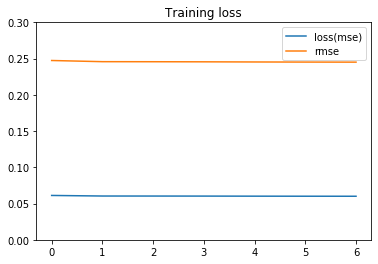

In [7]:
plt.plot(training1.history['loss'], label= 'loss(mse)')
plt.plot(np.sqrt(training1.history['mean_squared_error']), label= 'rmse')
plt.title('Training loss')
plt.ylim(0,0.3)
plt.legend(loc=1)
plt.show()

In [ ]:
batch_size = 1260
look_back = 33
def model_4(): #change neurons
    model = Sequential()
    model.add(LSTM(32, batch_input_shape=(batch_size, x_train.shape[1], x_train.shape[2]),
                   stateful = False))
    model.add(Dense(1))
    adam = optimizers.Adam()
    model.compile(loss='mse', optimizer=adam, metrics=['mean_squared_error'])

    return model

model4 = model_4()

#record training time
start=time.time()
training4=model4.fit(x_train, y_train, batch_size = 1260, epochs = 2, shuffle=False)
end=time.time()
print("--------------------------")
print("Total training time (seconds)", end-start)

# make predictions
trainPredict = model4.predict(x_train, batch_size = 1260)
testPredict = model4.predict(x_test,batch_size = 1260)

#test error
test_rmse = model4.evaluate(x_test, y_test,batch_size = 1260)
print("--------------------------")
print('RMSE' , test_rmse[0])






In [ ]:
plt.plot(training4.history['loss'], label= 'loss(mse)')
plt.plot(np.sqrt(training4.history['mean_squared_error']), label= 'rmse')
plt.title('Training loss')
plt.ylim(0,0.3)
plt.legend(loc=1)
plt.show()